# **INSIDER THREAT USING TRANSFORMERS ON USER ACTIVITY LOGS**

**Topik Riset:**

"Deteksi Ancaman Internal Menggunakan Transformer untuk Menganalisis Log Aktivitas Pengguna"

**Deskripsi:**

Transformer digunakan untuk menganalisis aktivitas pengguna secara menyeluruh. Model ini dilatih untuk mendeteksi pola akses yang tidak biasa oleh pengguna internal, seperti akses data di luar jam kerja atau aktivitas mencurigakan lainnya, dengan mempelajari urutan akses file dan sistem.

**Novelty:**

Sedang hingga tinggi. Insider threat sudah menjadi fokus penelitian dengan berbagai metode deteksi perilaku anomali. Namun, Transformer, dengan kemampuannya untuk menangkap perubahan perilaku yang halus dalam urutan log, menawarkan pendekatan baru yang dapat meningkatkan performa deteksi.


**Dataset: CERT Insider threat**

Dataset ini berisi data aktivitas pengguna yang mencurigakan dan bisa digunakan untuk mendeteksi Insider Threat. Model Transformer bisa mengenali pola akses yang anomali berdasarkan log pengguna.

URL: https://www.kaggle.com/datasets/nitishabharathi/cert-insider-threat


# **Importing Modules and Libraries**

In [1]:
!pip install numpy pandas seaborn matplotlib scikit-learn

In [2]:
!pip list | findstr numpy

/bin/bash: line 1: findstr: command not found
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [3]:
!pip install torch torchvision torchaudio

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# **Importing Datasets**

In [2]:
import pandas as pd

Data = pd.read_csv('email.csv')

In [3]:
Data.head(n=5)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [4]:
data = Data.sample(frac=0.02, random_state=42)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52600 entries, 1375085 to 2049455
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           52600 non-null  object
 1   date         52600 non-null  object
 2   user         52600 non-null  object
 3   pc           52600 non-null  object
 4   to           52600 non-null  object
 5   cc           20035 non-null  object
 6   bcc          8272 non-null   object
 7   from         52600 non-null  object
 8   size         52600 non-null  int64 
 9   attachments  52600 non-null  int64 
 10  content      52600 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.8+ MB


In [6]:
# Threshold ukuran (25KB)
size_threshold = 25000

# Fungsi untuk menentukan aktivitas di luar jam kerja
def is_after_hours(date_str):
    hour = pd.to_datetime(date_str).hour  # Ekstrak jam dari 'date'
    return hour < 8 or hour > 18  # Jam kerja dianggap antara 08:00 - 18:00

# Membuat label (1 = mencurigakan, 0 = normal)
data['label'] = data.apply(lambda x:
    1 if x['size'] > size_threshold or is_after_hours(x['date']) else 0, axis=1)

# Cek hasil labeling
print(data[['user', 'date', 'size', 'label']].head())


            user                 date   size  label
1375085  HWH0646  09/08/2010 09:48:21  53433      1
1760687  EMW0772  11/18/2010 11:40:48  23746      0
489761   HAD0246  03/29/2010 14:40:35  20984      0
670295   ASB0796  04/30/2010 10:57:44  33996      1
2611719  HCW0419  05/12/2011 11:45:23  37670      1


In [7]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


label
1    35281
0    17319
Name: count, dtype: int64
Jumlah kelas unik: 2


In [8]:
data.shape

(52600, 12)

# **Data Visualization**

In [9]:
print(data.columns)

Index(['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size',
       'attachments', 'content', 'label'],
      dtype='object')


In [10]:
print(data['label'].value_counts())

label
1    35281
0    17319
Name: count, dtype: int64


Jumlah kelas unik: 2


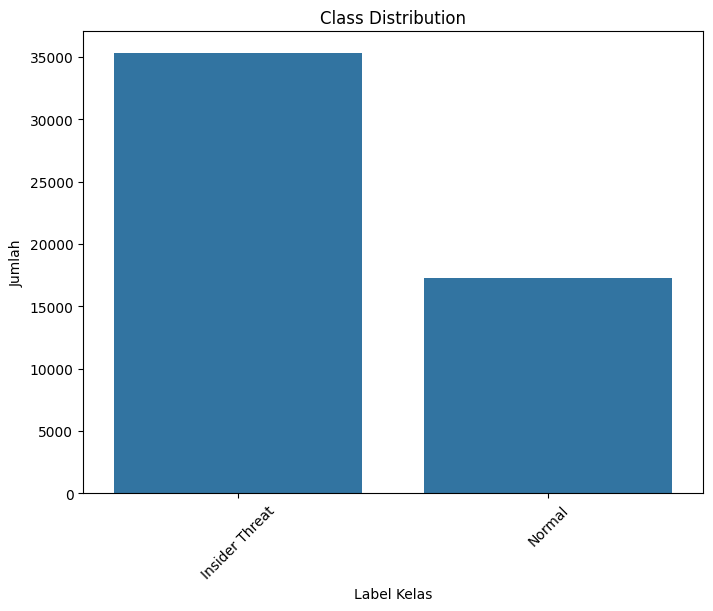

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan Anda telah menyiapkan DataFrame data
# Gantilah 'label' dengan nilai string sesuai label Anda
data['label'] = data['label'].replace({
    0: "Normal",
    1: "Insider Threat",
})

# Hitung jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualisasi distribusi kelas dengan nama
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
plt.show()


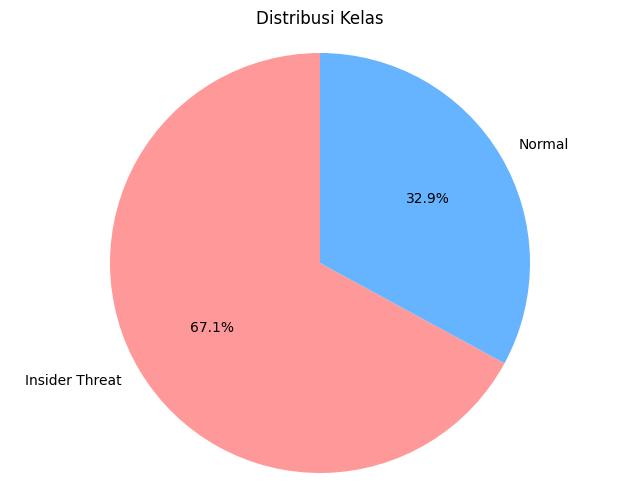

In [12]:
# Hitung jumlah setiap kelas
kelas_count = data['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas_count, labels=kelas_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.title('Distribusi Kelas')
plt.show()


In [13]:
# Kembali ke format numerik
data['label'] = data['label'].replace({
    "Normal": 0,
    "Insider Threat": 1
}).astype(int)  # Pastikan kolom menjadi integer

# Pastikan nilai kembali ke format numerik
print(data['label'].value_counts())


label
1    35281
0    17319
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5876\4173804448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace({


# **DATA SPLITTING**

In [9]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

features = ['size', 'attachments', 'user', 'to', 'from', 'content']

# Data
X = data[features]  # Fitur
y = data['label']   # Target label

# Pisahkan fitur numerik dan teks
numeric_features = ['size', 'attachments', 'user', 'to', 'from']
text_feature = ['content']

# Label encode untuk fitur kategori
label_encoder = LabelEncoder()
data['user'] = label_encoder.fit_transform(data['user'])
data['to'] = label_encoder.fit_transform(data['to'])
data['from'] = label_encoder.fit_transform(data['from'])

# TF-IDF untuk mengonversi 'content' menjadi representasi vektor
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Mengurangi jumlah fitur untuk menghemat memori
X_content_tfidf = tfidf_vectorizer.fit_transform(data['content'])  # Menggunakan sparse matrix langsung

# Pisahkan fitur numerik dan teks dalam X
X_numeric = data[numeric_features]
X_text = pd.DataFrame(X_content_tfidf.toarray())  # Mengonversi sparse matrix ke DataFrame untuk proses lebih lanjut

# Gabungkan fitur numerik dengan fitur teks setelah TF-IDF
X_combined = pd.concat([X_numeric, X_text], axis=1)

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined[numeric_features])

# Sesuaikan jumlah baris antara X_scaled dan y (menggunakan slicing array numpy)
X_scaled = X_scaled[:len(y), :]  # Menyamakan jumlah baris pada X_scaled dengan y

# Gabungkan kembali data numerik yang telah di-scaling dengan fitur teks
X_combined_scaled = pd.concat([pd.DataFrame(X_scaled), X_text], axis=1)

# Pisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y, test_size=0.2, random_state=42)

# Cek data yang sudah diproses
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Cek distribusi label
y_distribution = y.value_counts()
print(y_distribution)


(42080, 1005) (42080,)
(10520, 1005) (10520,)
label
1    35281
0    17319
Name: count, dtype: int64


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [28]:
!pip install transformers tensorflow scikit-learn matplotlib pandas

In [29]:
!pip install transformers torch scikit-learn

In [21]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# **1. TRANSFORMER "ENCODER" + Dataset Awal**

# **CLASSIFICATION**


Fold 1
Accuracy for fold 1: 92.81%
F1 Score for fold 1: 0.9294
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1777
           1       0.99      0.90      0.94      3483

    accuracy                           0.93      5260
   macro avg       0.91      0.94      0.92      5260
weighted avg       0.94      0.93      0.93      5260



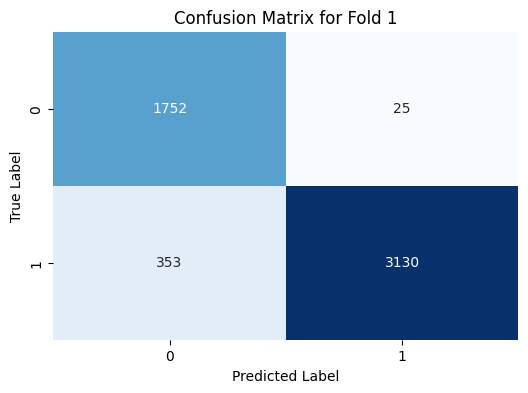

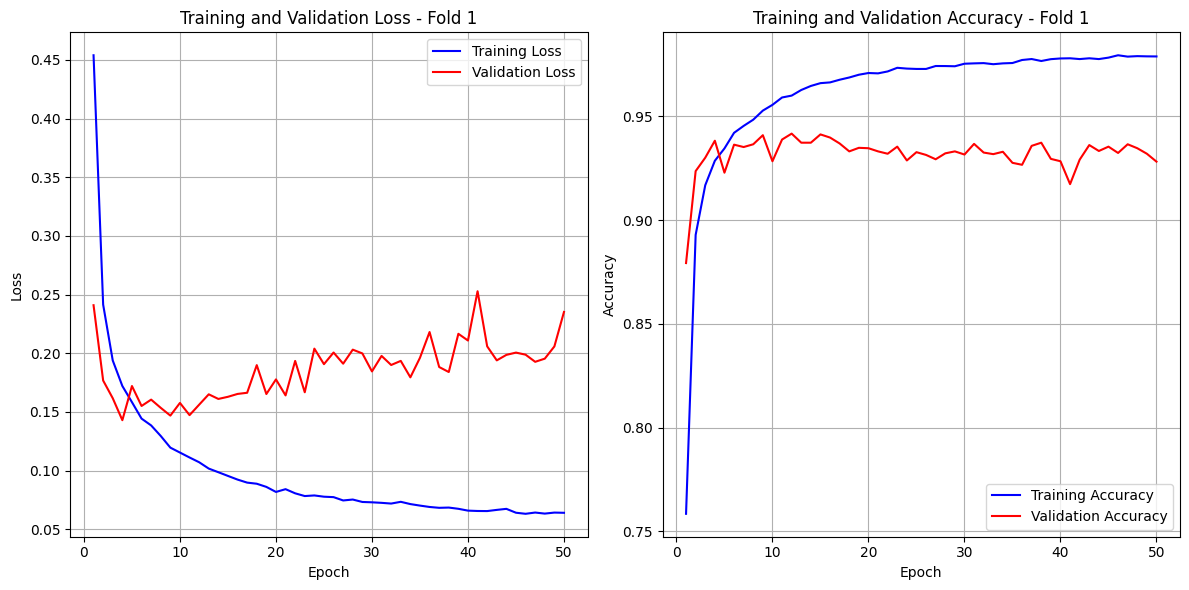


Fold 2
Accuracy for fold 2: 93.37%
F1 Score for fold 2: 0.9347
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1745
           1       0.99      0.91      0.95      3515

    accuracy                           0.93      5260
   macro avg       0.92      0.94      0.93      5260
weighted avg       0.94      0.93      0.93      5260



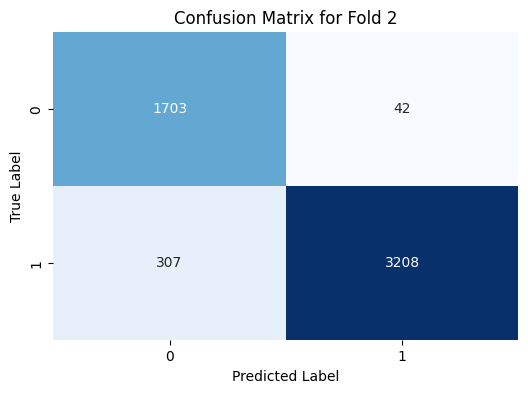

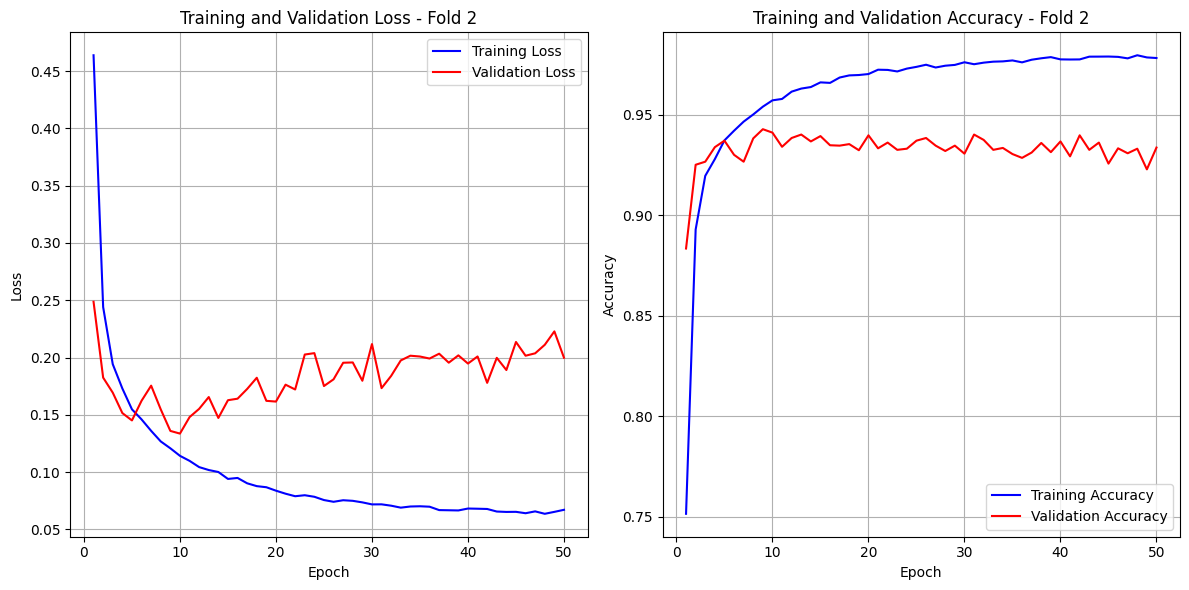


Fold 3
Accuracy for fold 3: 93.86%
F1 Score for fold 3: 0.9396
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1694
           1       0.99      0.92      0.95      3566

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.95      0.94      0.94      5260



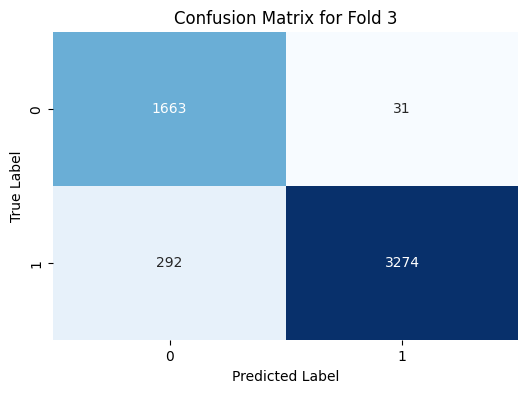

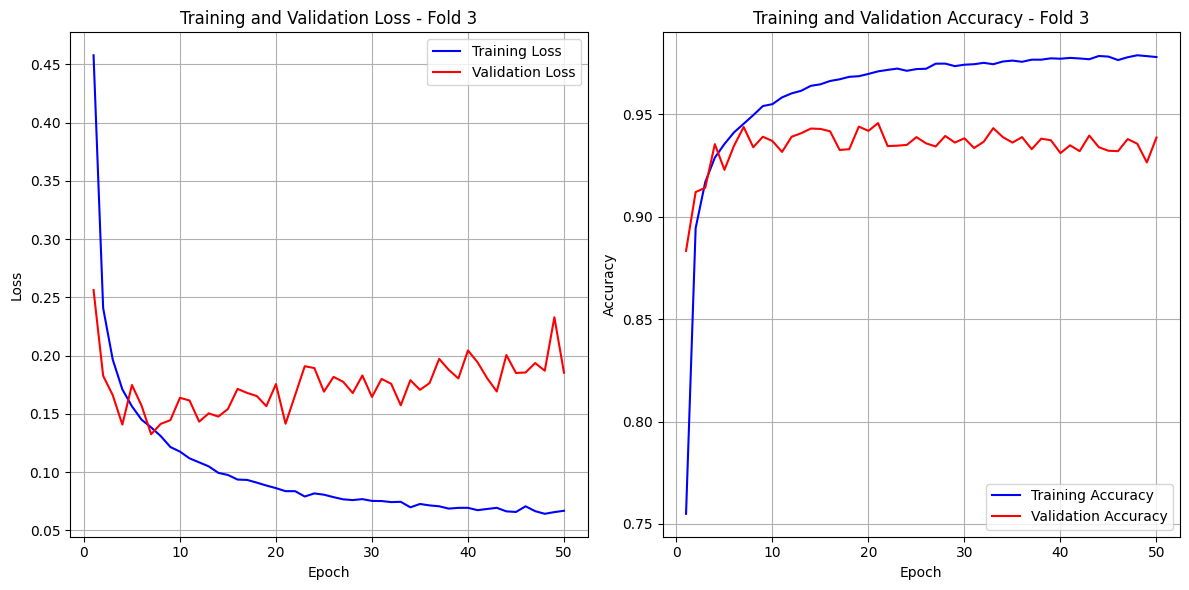


Fold 4
Accuracy for fold 4: 92.79%
F1 Score for fold 4: 0.9292
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1752
           1       0.99      0.90      0.94      3508

    accuracy                           0.93      5260
   macro avg       0.91      0.94      0.92      5260
weighted avg       0.94      0.93      0.93      5260



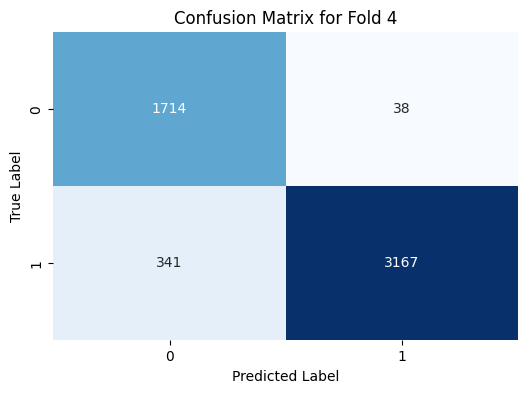

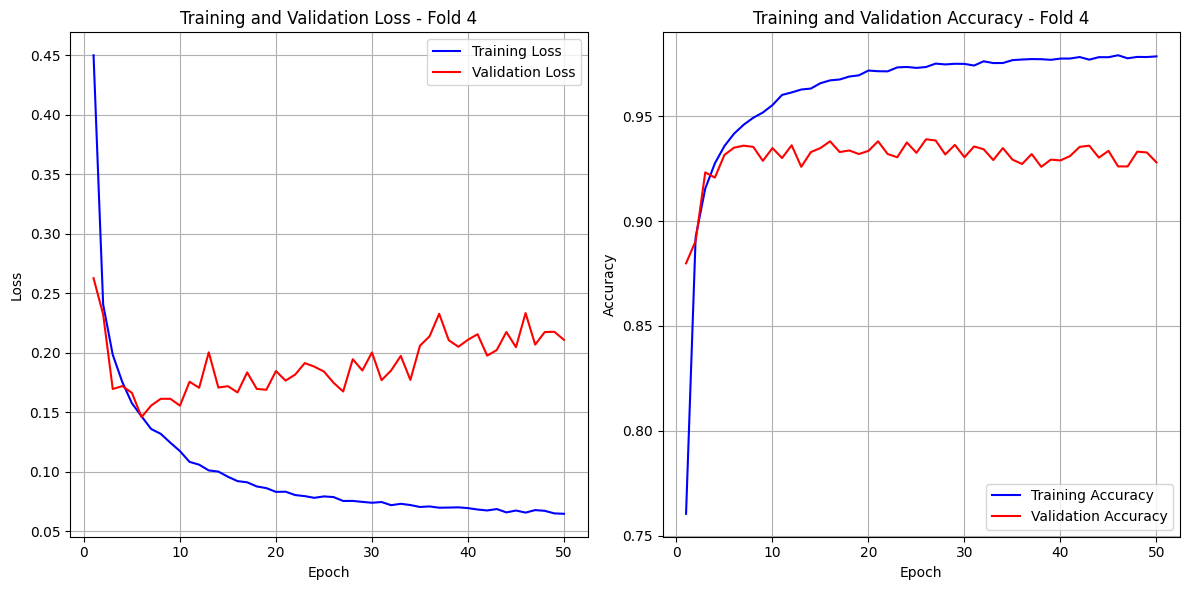


Fold 5
Accuracy for fold 5: 93.95%
F1 Score for fold 5: 0.9405
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1740
           1       0.99      0.92      0.95      3520

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.95      0.94      0.94      5260



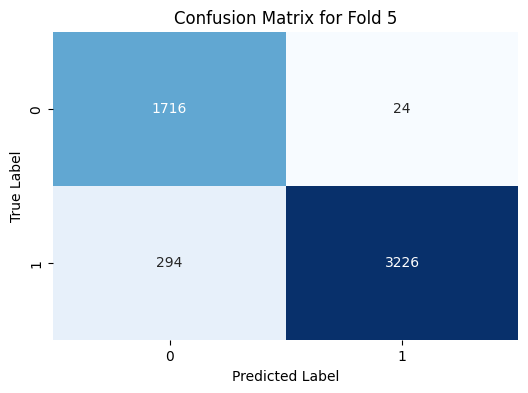

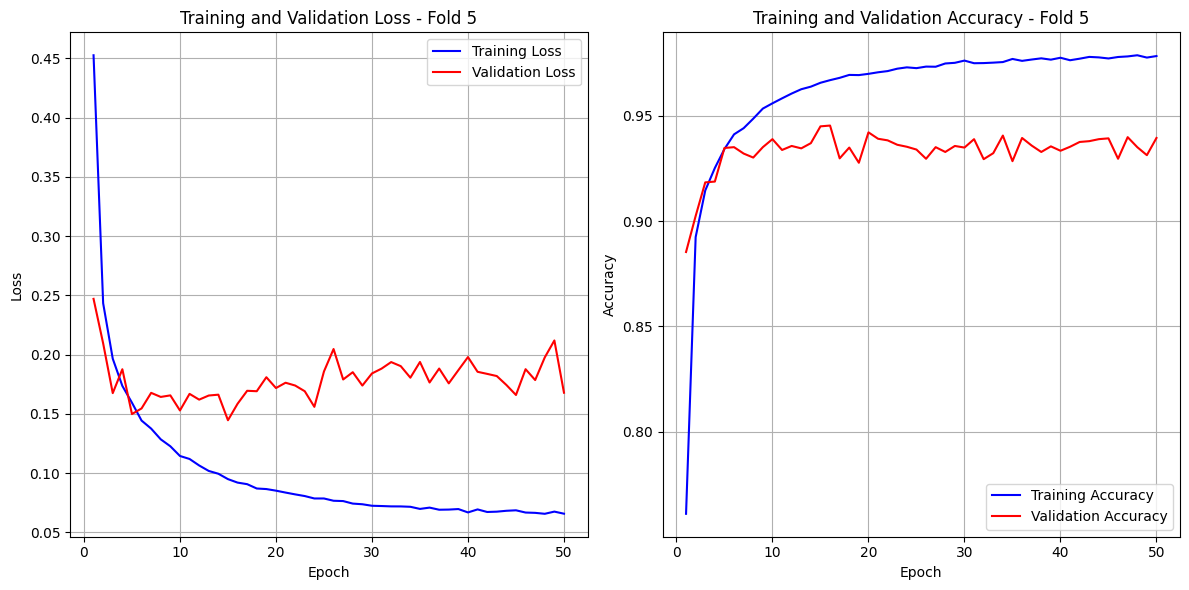


Fold 6
Accuracy for fold 6: 92.60%
F1 Score for fold 6: 0.9275
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1691
           1       0.99      0.90      0.94      3569

    accuracy                           0.93      5260
   macro avg       0.91      0.94      0.92      5260
weighted avg       0.94      0.93      0.93      5260



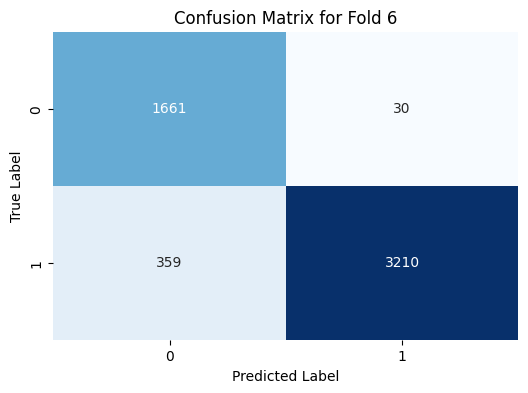

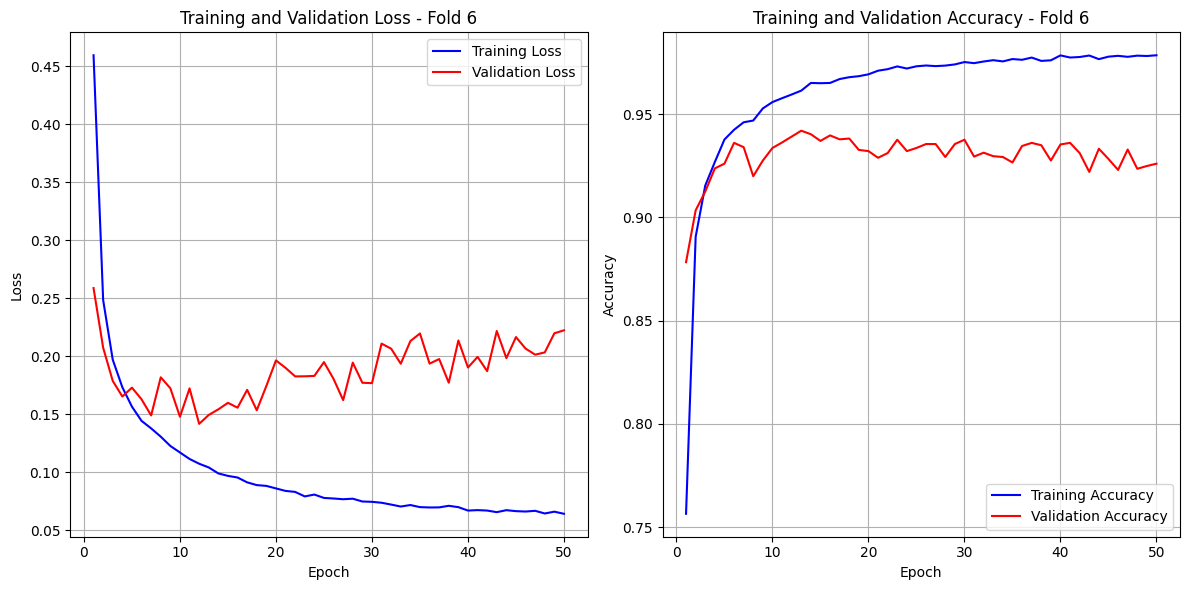


Fold 7
Accuracy for fold 7: 93.35%
F1 Score for fold 7: 0.9346
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1719
           1       0.99      0.91      0.95      3541

    accuracy                           0.93      5260
   macro avg       0.92      0.94      0.93      5260
weighted avg       0.94      0.93      0.93      5260



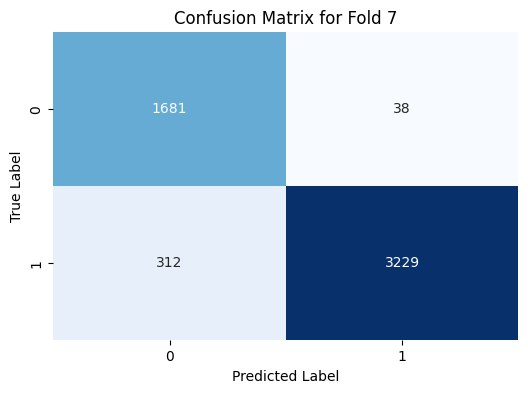

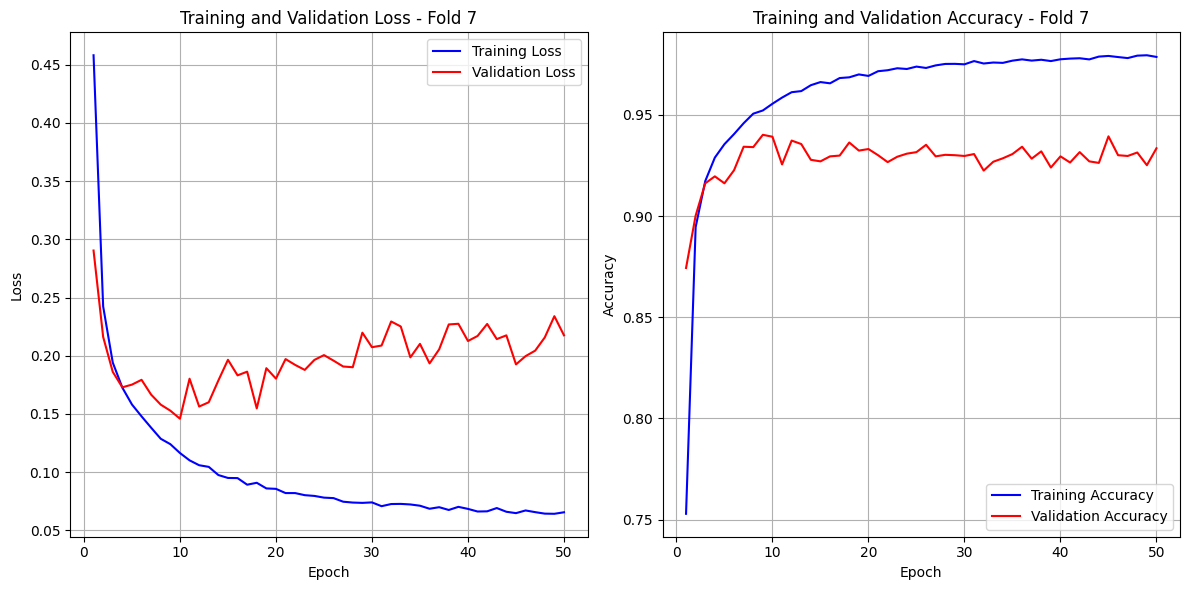


Fold 8
Accuracy for fold 8: 92.30%
F1 Score for fold 8: 0.9245
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1777
           1       0.99      0.89      0.94      3483

    accuracy                           0.92      5260
   macro avg       0.91      0.94      0.92      5260
weighted avg       0.94      0.92      0.92      5260



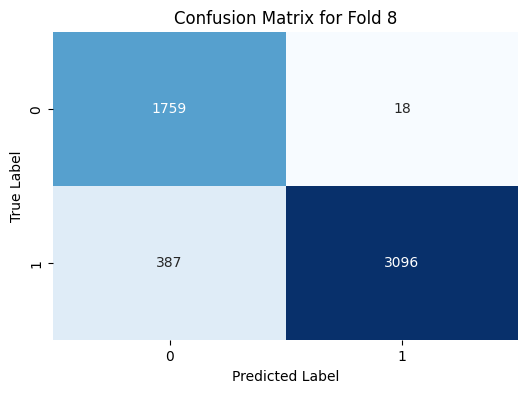

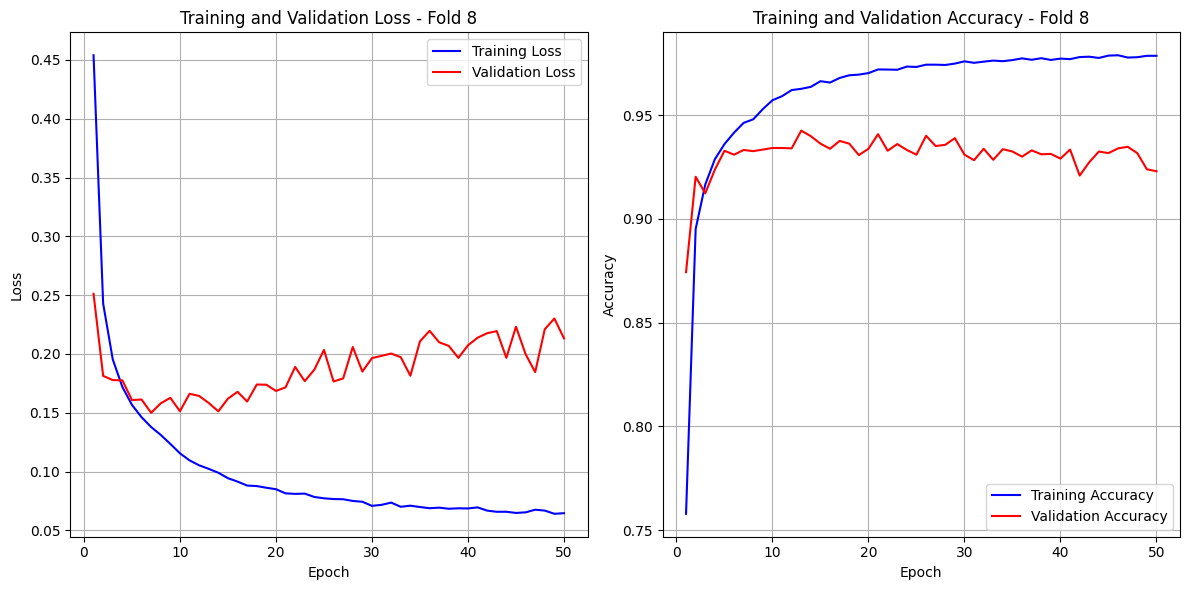


Fold 9
Accuracy for fold 9: 91.60%
F1 Score for fold 9: 0.9179
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1695
           1       0.99      0.88      0.93      3565

    accuracy                           0.92      5260
   macro avg       0.90      0.93      0.91      5260
weighted avg       0.93      0.92      0.92      5260



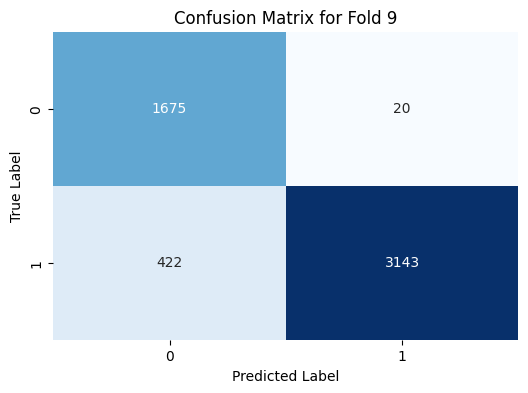

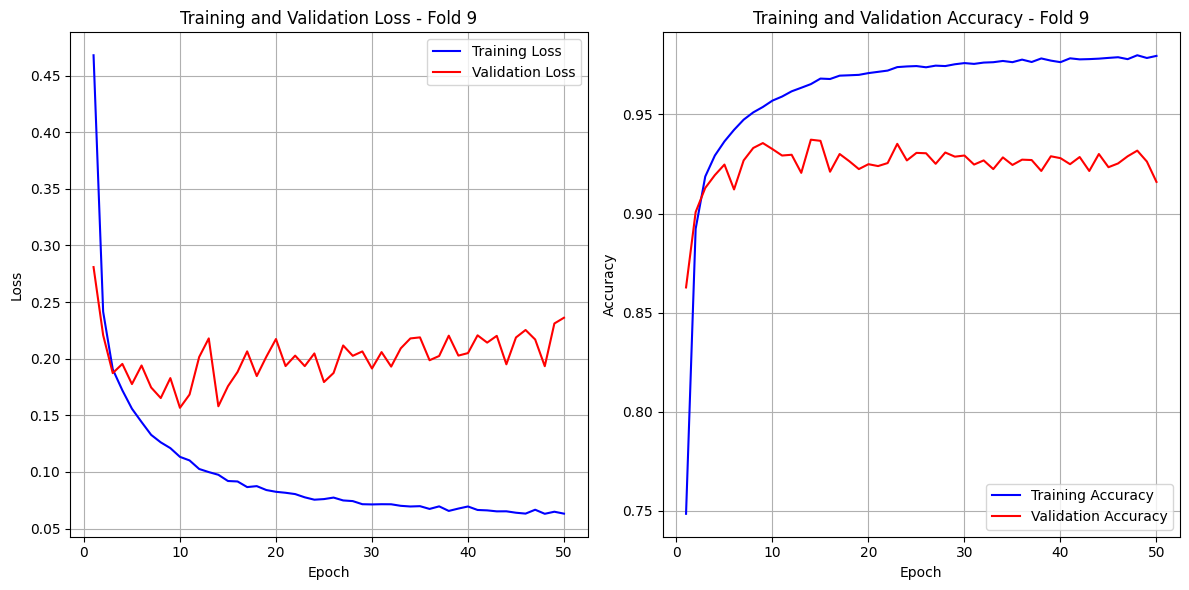


Fold 10
Accuracy for fold 10: 93.04%
F1 Score for fold 10: 0.9317
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1729
           1       0.99      0.90      0.95      3531

    accuracy                           0.93      5260
   macro avg       0.91      0.94      0.92      5260
weighted avg       0.94      0.93      0.93      5260



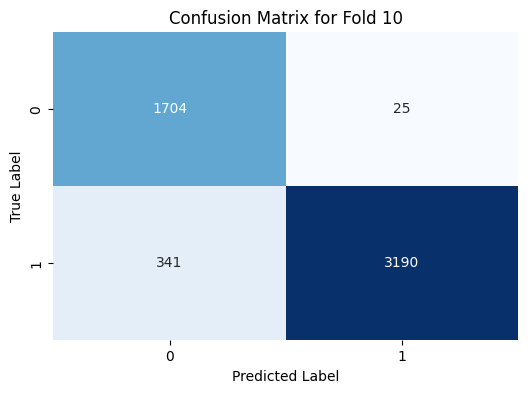

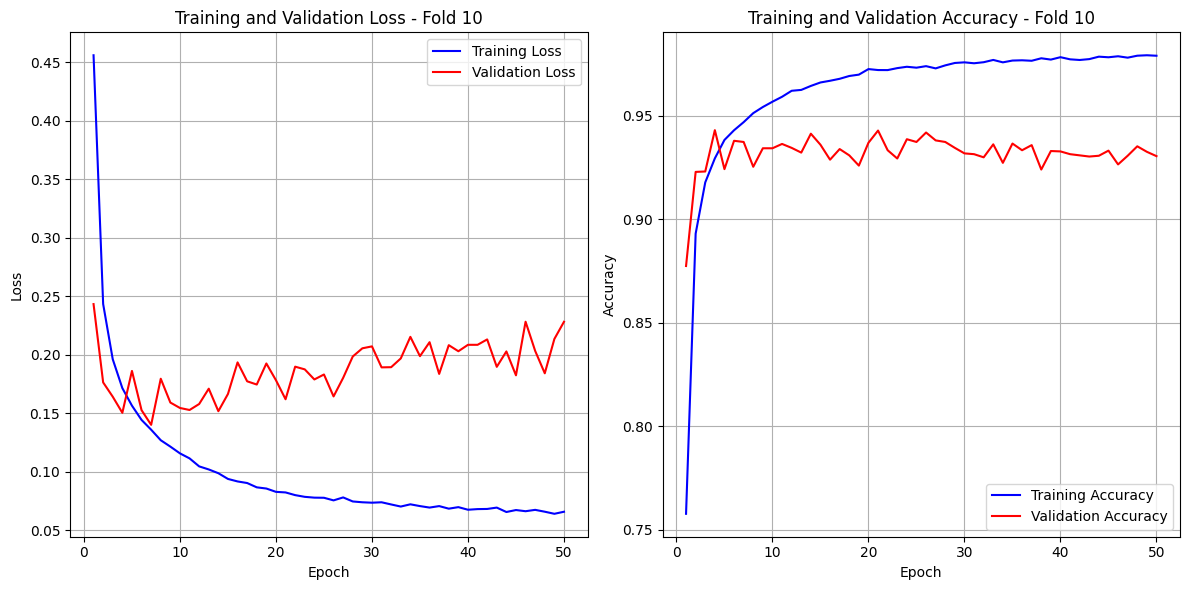


Average Accuracy: 92.97%
Average F1 Score: 0.9310


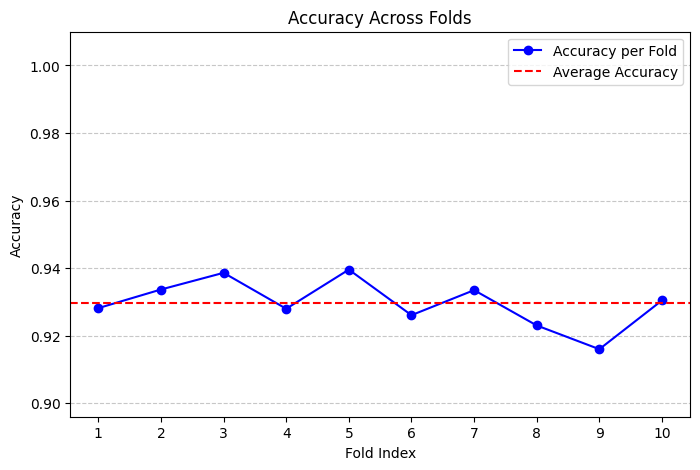

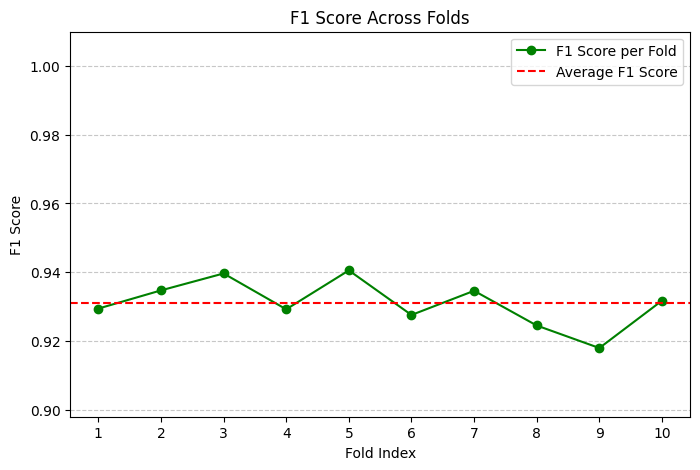

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Define Transformer Model 
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.3):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout(x)  # Apply dropout after embedding
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# Data from preprocessing
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses, average_val_losses = [], []
average_train_accuracies, average_val_accuracies = [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_combined_scaled)):
    print(f'\nFold {fold + 1}')

    # Split data
    X_train, X_val = X_combined_scaled.iloc[train_index], X_combined_scaled.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Ensure numeric data and handle missing values
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_tensor = torch.FloatTensor(class_weights).to('cpu')

    # Initialize model, loss, and optimizer
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(np.unique(y)), d_model=64, nhead=2, num_layers=2, dropout=0.3)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

    # Train the model
    num_epochs = 50
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct_train, total_train = 0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            # Train accuracy
            _, predicted_train = torch.max(outputs, 1)
            correct_train += (predicted_train == labels).sum().item()
            total_train += labels.size(0)

        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            val_loss = criterion(y_pred_probs, y_val_tensor).item()
            val_losses.append(val_loss)
            _, y_pred = torch.max(y_pred_probs, 1)

        val_accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(val_accuracy)

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(val_accuracies[-1])
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print fold results
    print(f"Accuracy for fold {fold + 1}: {val_accuracies[-1] * 100:.2f}%")
    print(f"F1 Score for fold {fold + 1}: {f1:.4f}")
    print(classification_report(y_val, y_pred.numpy()))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

    # Plot Training and Validation Loss per Epoch for this fold
    plt.figure(figsize=(12, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
    plt.title(f'Training and Validation Loss - Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='red')
    plt.title(f'Training and Validation Accuracy - Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Average Metrics Across All Folds
print(f'\nAverage Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')  

# Plotting Accuracy and F1 Score for all folds
folds = range(1, len(all_accuracy) + 1)

# Accuracy Across Folds
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(all_accuracy) + 1), all_accuracy, color='blue', marker='o', label='Accuracy per Fold')
plt.axhline(y=np.mean(all_accuracy), color='red', linestyle='--', label='Average Accuracy')
plt.title('Accuracy Across Folds')
plt.xlabel('Fold Index')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(all_accuracy) + 1))
plt.ylim(min(all_accuracy) - 0.02, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# F1 Score Across Folds
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(all_f1_scores) + 1), all_f1_scores, color='green', marker='o', label='F1 Score per Fold')
plt.axhline(y=np.mean(all_f1_scores), color='red', linestyle='--', label='Average F1 Score')
plt.title('F1 Score Across Folds')
plt.xlabel('Fold Index')
plt.ylabel('F1 Score')
plt.xticks(range(1, len(all_f1_scores) + 1))
plt.ylim(min(all_f1_scores) - 0.02, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ** Best Hyperparameter Tuning sama dengan default**

In [20]:
from itertools import product
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm  # Untuk progress bar

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.0005],
    'num_layers': [2, 3],
    'd_model': [64, 128]
}

# Track the best hyperparameters
best_params = {}
best_f1_score = 0

# Label Encoding untuk kolom 'label'
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['label'])
class_names = label_encoder.classes_

# Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# Progress bar for parameter tuning
param_combinations = list(product(*param_grid.values()))
print(f"Fitting {len(param_combinations)} combinations...")

for params in tqdm(param_combinations, desc="Hyperparameter Tuning"):
    lr, num_layers, d_model = params
    print(f"Testing params: learning_rate={lr}, num_layers={num_layers}, d_model={d_model}")
    
    all_f1_scores = []

    # 5-fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=50)
    for train_index, val_index in kf.split(data):
        X_train, X_val = data.drop(columns=['label', 'Label_encoded']).iloc[train_index], \
                         data.drop(columns=['label', 'Label_encoded']).iloc[val_index]
        y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

        # Preprocessing
        X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
        X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)
        X_train_tensor = torch.FloatTensor(X_train.values)
        y_train_tensor = torch.LongTensor(y_train.values)
        X_val_tensor = torch.FloatTensor(X_val.values)
        y_val_tensor = torch.LongTensor(y_val.values)

        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

        # Initialize model
        model = TransformerModel(input_dim=X_train_tensor.shape[1],
                                 num_classes=len(class_names),
                                 d_model=d_model,
                                 num_layers=num_layers)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Training loop
        for epoch in range(50):  # Example epoch count
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)
        f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
        all_f1_scores.append(f1)

    # Average F1-score across folds
    avg_f1_score = np.mean(all_f1_scores)

    # Track the best hyperparameters
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_params = {
            'learning_rate': lr,
            'num_layers': num_layers,
            'd_model': d_model
        }

# Output the best parameters
print(f"Best Parameters: {best_params}")
print(f"Best F1-Score: {best_f1_score:.4f}")


Fitting 8 combinations...


Hyperparameter Tuning:   0%|                                                                     | 0/8 [00:00<?, ?it/s]

Testing params: learning_rate=0.001, num_layers=2, d_model=64


Hyperparameter Tuning:  12%|██████▋                                              | 1/8 [4:44:56<33:14:38, 17096.92s/it]

Testing params: learning_rate=0.001, num_layers=2, d_model=128


Hyperparameter Tuning:  25%|█████████████                                       | 2/8 [11:16:31<34:45:59, 20859.99s/it]

Testing params: learning_rate=0.001, num_layers=3, d_model=64


Hyperparameter Tuning:  38%|███████████████████▌                                | 3/8 [17:34:37<30:07:49, 21693.88s/it]

Testing params: learning_rate=0.001, num_layers=3, d_model=128


Hyperparameter Tuning:  50%|██████████████████████████                          | 4/8 [26:47:12<29:07:54, 26218.62s/it]

Testing params: learning_rate=0.0005, num_layers=2, d_model=64


Hyperparameter Tuning:  62%|████████████████████████████████▌                   | 5/8 [31:57:55<19:34:20, 23486.90s/it]

Testing params: learning_rate=0.0005, num_layers=2, d_model=128


Hyperparameter Tuning:  75%|███████████████████████████████████████             | 6/8 [39:06:20<13:28:02, 24241.18s/it]

Testing params: learning_rate=0.0005, num_layers=3, d_model=64


Hyperparameter Tuning:  88%|██████████████████████████████████████████████▍      | 7/8 [48:06:24<7:28:29, 26909.59s/it]

Testing params: learning_rate=0.0005, num_layers=3, d_model=128


Hyperparameter Tuning: 100%|███████████████████████████████████████████████████████| 8/8 [57:46:45<00:00, 26000.71s/it]

Best Parameters: {'learning_rate': 0.001, 'num_layers': 2, 'd_model': 64}
Best F1-Score: 0.5386


In [ ]:
# **CLASSIFICATION Hyperparameter Tuning**


Fold 1
Early stopping triggered at epoch 10
Accuracy for fold 1: 93.52%
F1 Score for fold 1: 0.9363
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1777
           1       1.00      0.91      0.95      3483

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.94      0.94      0.94      5260



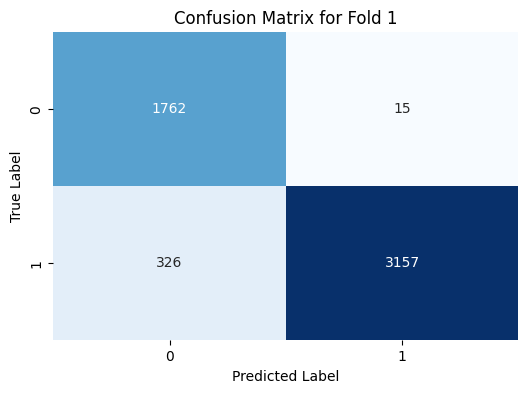

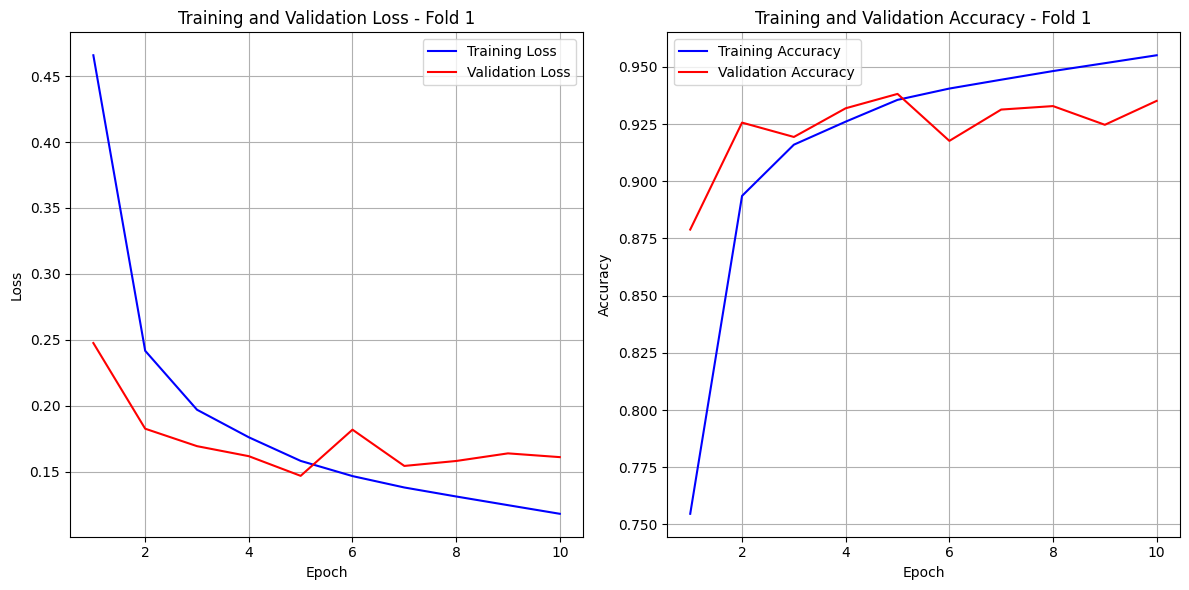


Fold 2
Early stopping triggered at epoch 12
Accuracy for fold 2: 93.80%
F1 Score for fold 2: 0.9390
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1745
           1       0.99      0.91      0.95      3515

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.95      0.94      0.94      5260



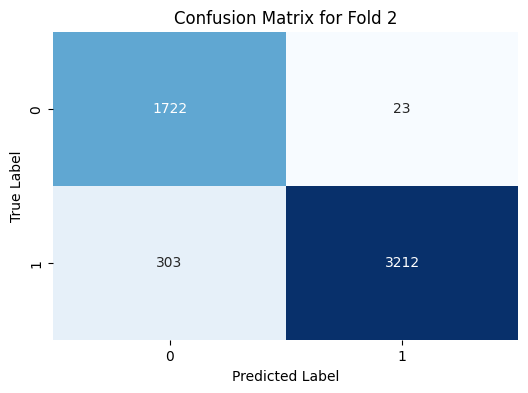

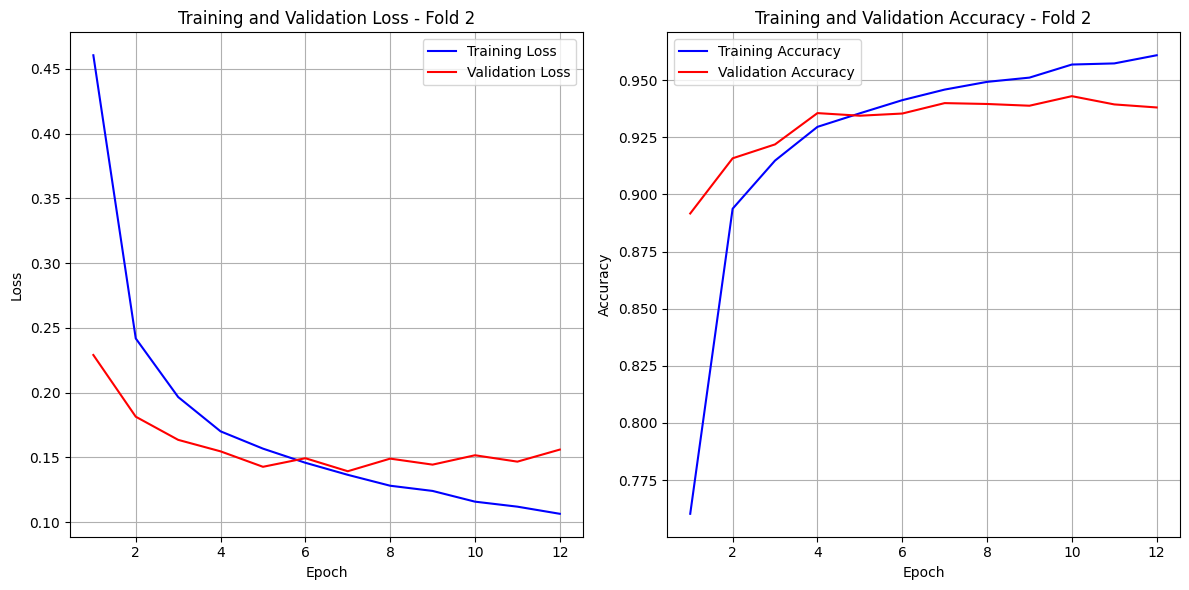


Fold 3
Early stopping triggered at epoch 17
Accuracy for fold 3: 94.30%
F1 Score for fold 3: 0.9438
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1694
           1       0.99      0.93      0.96      3566

    accuracy                           0.94      5260
   macro avg       0.93      0.95      0.94      5260
weighted avg       0.95      0.94      0.94      5260



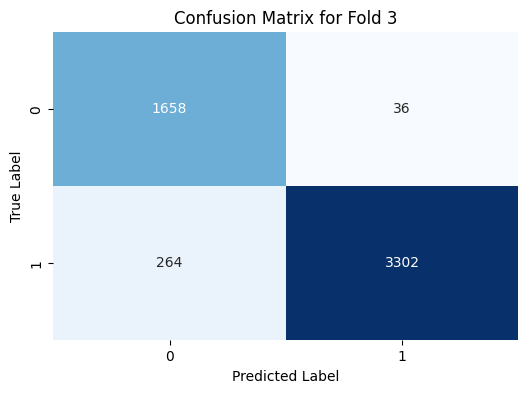

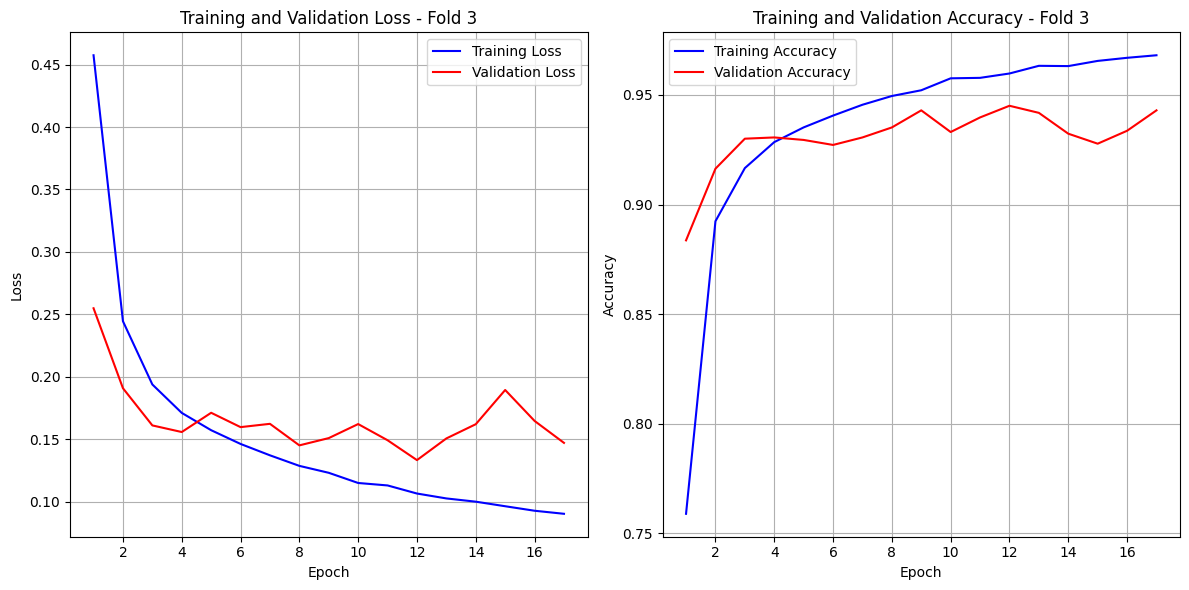


Fold 4
Early stopping triggered at epoch 13
Accuracy for fold 4: 93.50%
F1 Score for fold 4: 0.9361
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1752
           1       0.99      0.91      0.95      3508

    accuracy                           0.93      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.94      0.93      0.94      5260



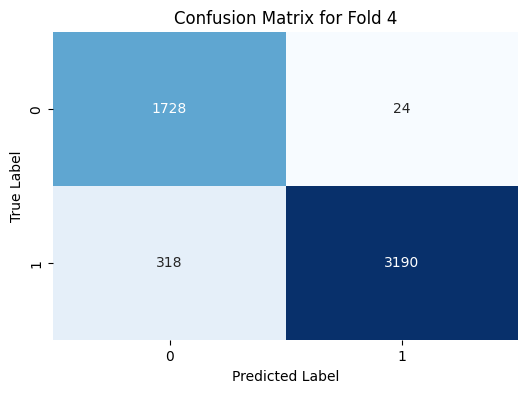

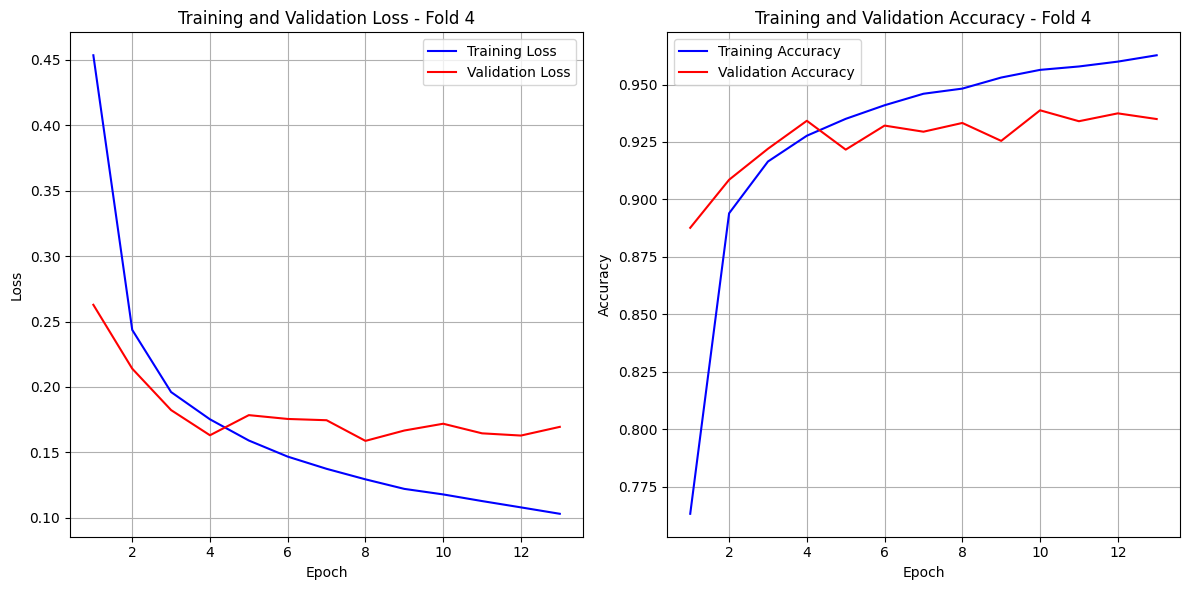


Fold 5
Early stopping triggered at epoch 10
Accuracy for fold 5: 93.90%
F1 Score for fold 5: 0.9400
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1740
           1       0.99      0.92      0.95      3520

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.95      0.94      0.94      5260



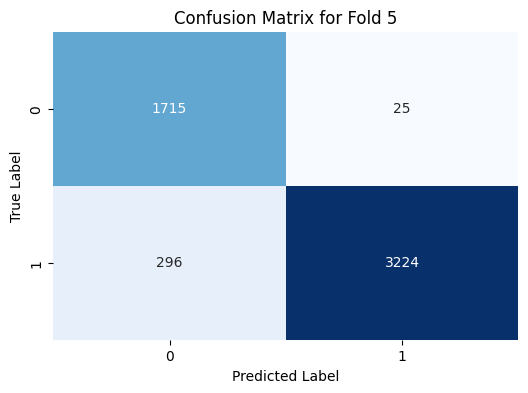

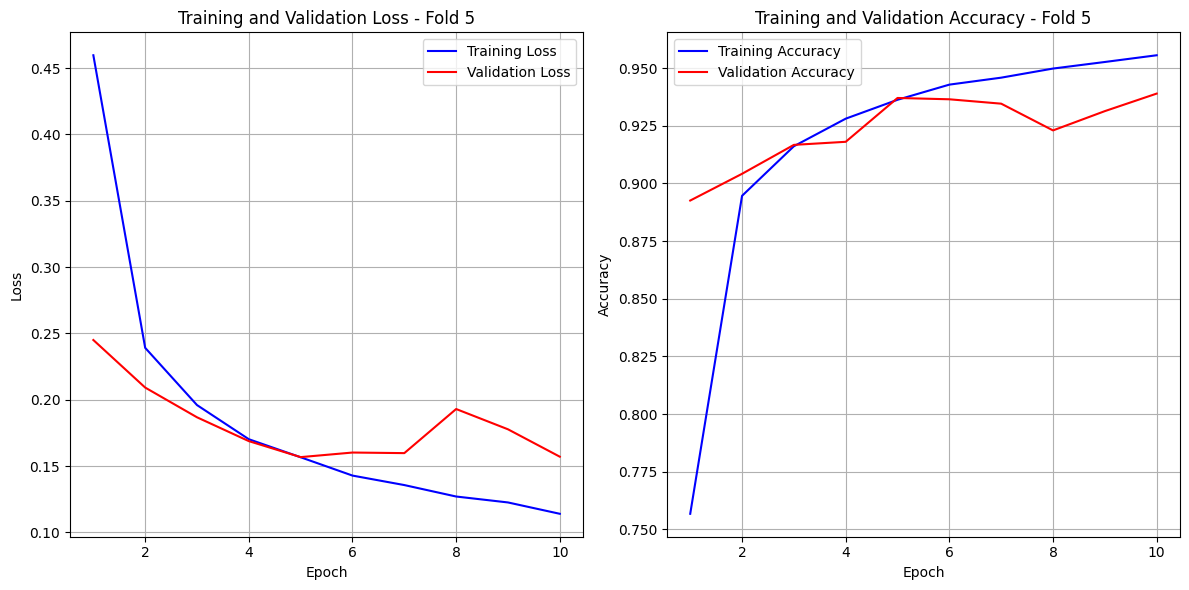


Fold 6
Early stopping triggered at epoch 14
Accuracy for fold 6: 92.79%
F1 Score for fold 6: 0.9295
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1691
           1       1.00      0.90      0.94      3569

    accuracy                           0.93      5260
   macro avg       0.91      0.94      0.92      5260
weighted avg       0.94      0.93      0.93      5260



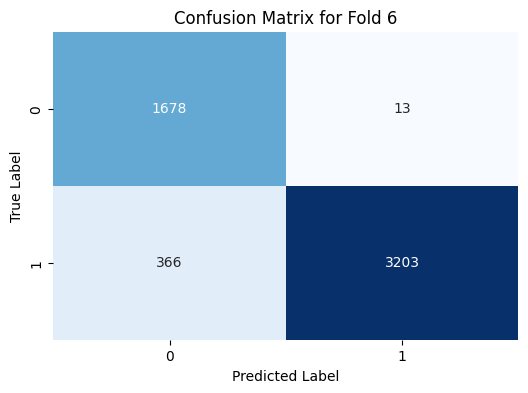

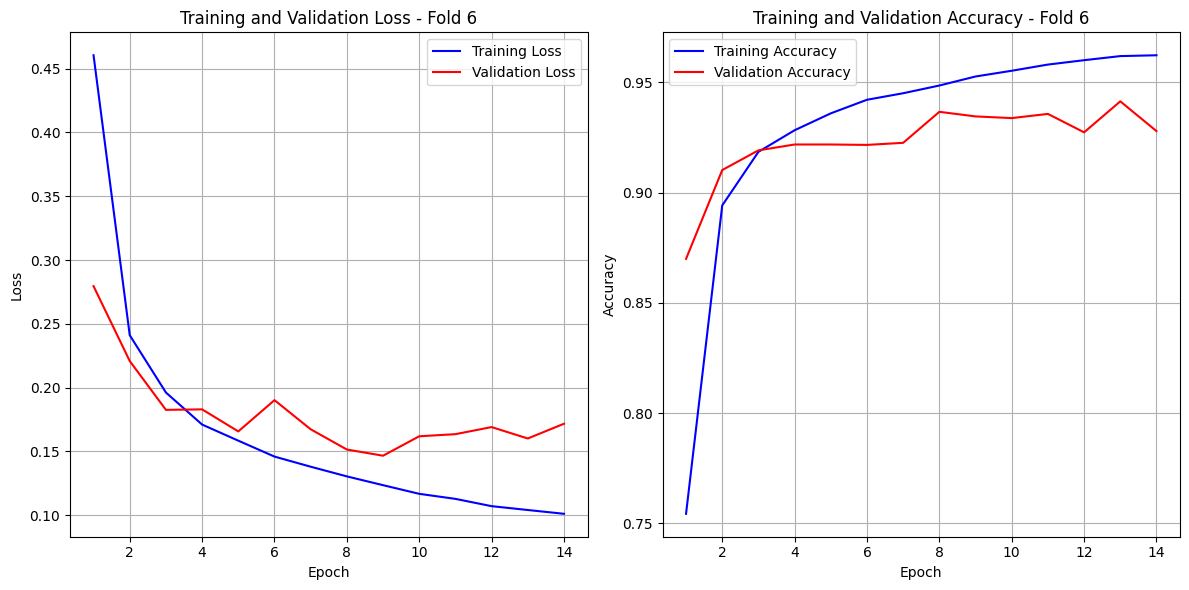


Fold 7
Early stopping triggered at epoch 14
Accuracy for fold 7: 93.19%
F1 Score for fold 7: 0.9332
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1719
           1       0.99      0.91      0.95      3541

    accuracy                           0.93      5260
   macro avg       0.91      0.94      0.93      5260
weighted avg       0.94      0.93      0.93      5260



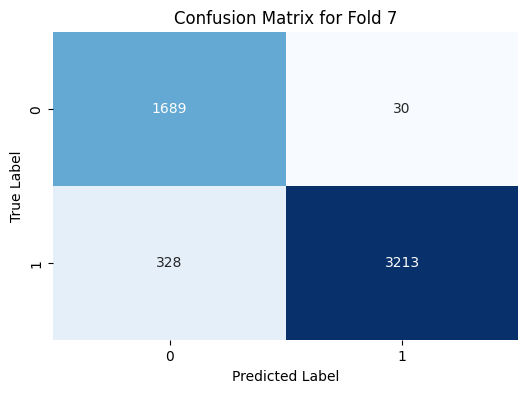

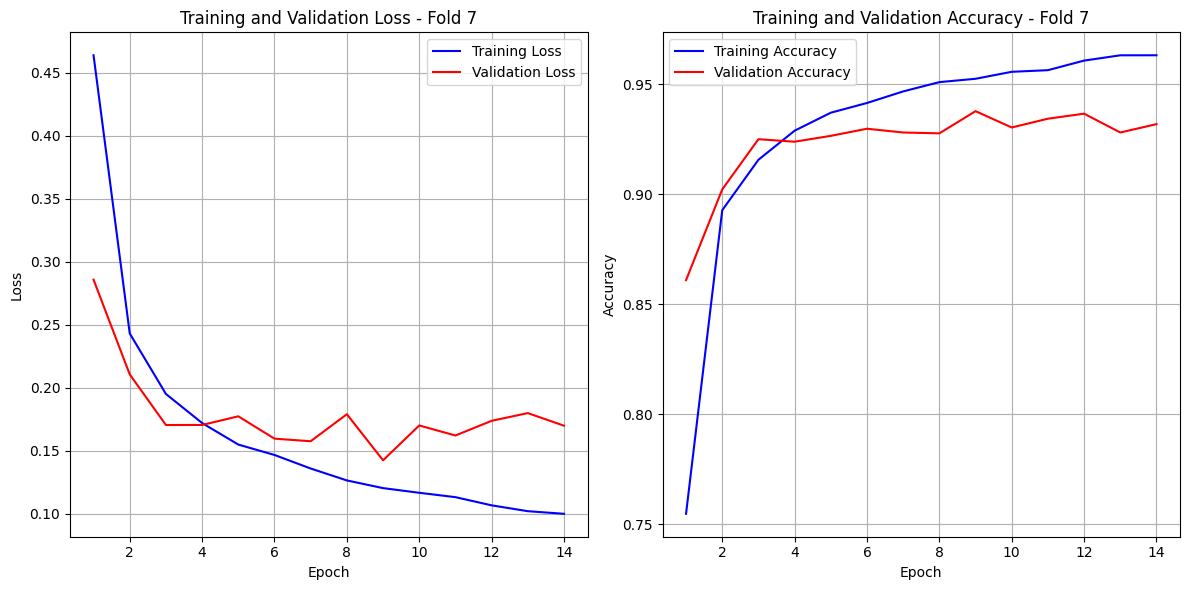


Fold 8
Early stopping triggered at epoch 13
Accuracy for fold 8: 93.52%
F1 Score for fold 8: 0.9362
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1777
           1       0.99      0.91      0.95      3483

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.94      0.94      0.94      5260



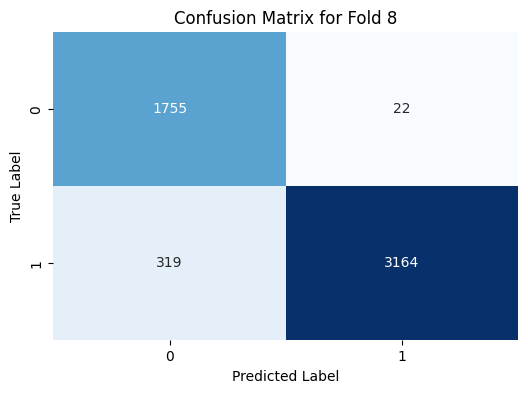

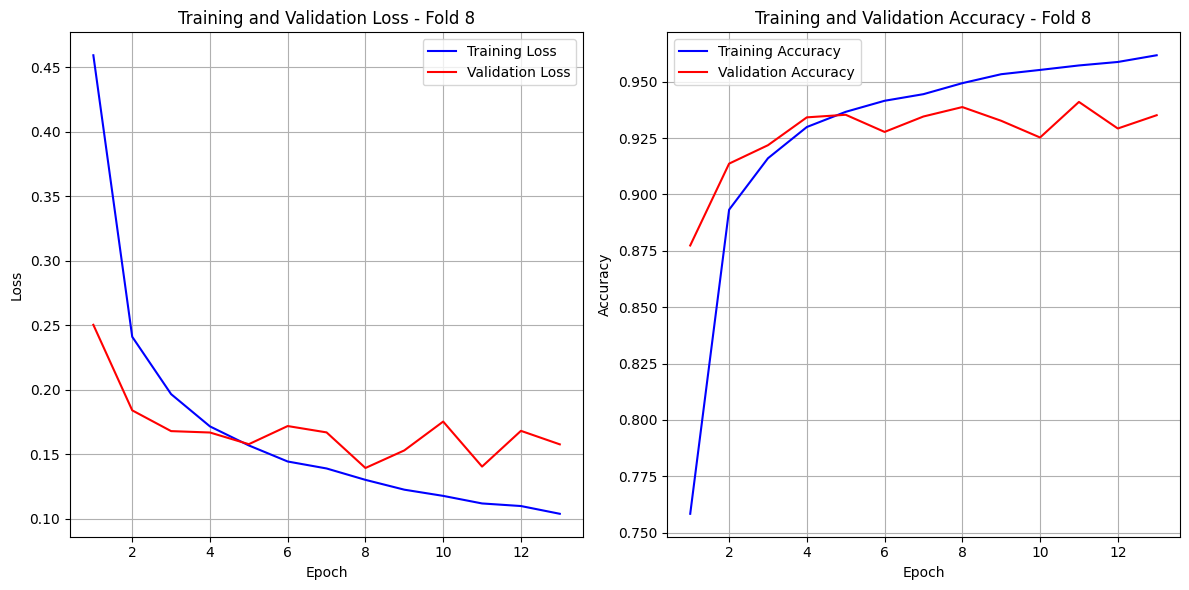


Fold 9
Early stopping triggered at epoch 18
Accuracy for fold 9: 92.30%
F1 Score for fold 9: 0.9247
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1695
           1       0.99      0.89      0.94      3565

    accuracy                           0.92      5260
   macro avg       0.90      0.94      0.92      5260
weighted avg       0.94      0.92      0.92      5260



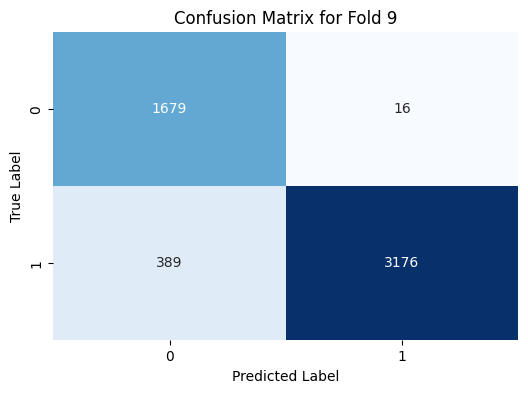

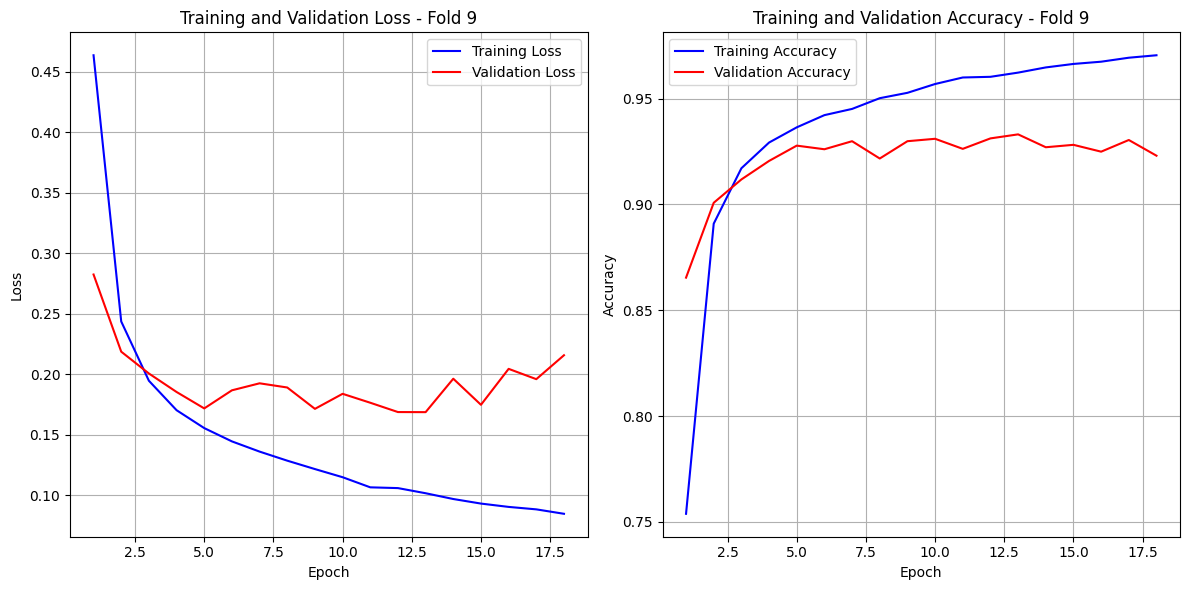


Fold 10
Early stopping triggered at epoch 9
Accuracy for fold 10: 94.01%
F1 Score for fold 10: 0.9410
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1729
           1       0.99      0.92      0.95      3531

    accuracy                           0.94      5260
   macro avg       0.92      0.95      0.93      5260
weighted avg       0.95      0.94      0.94      5260



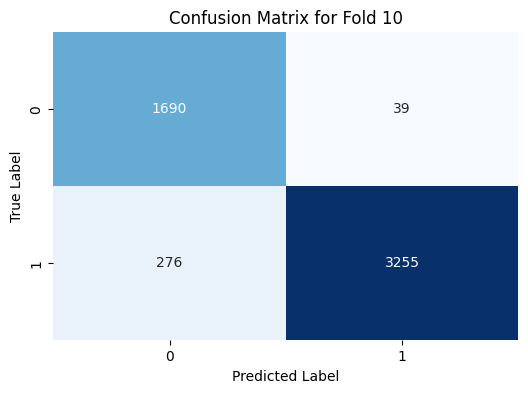

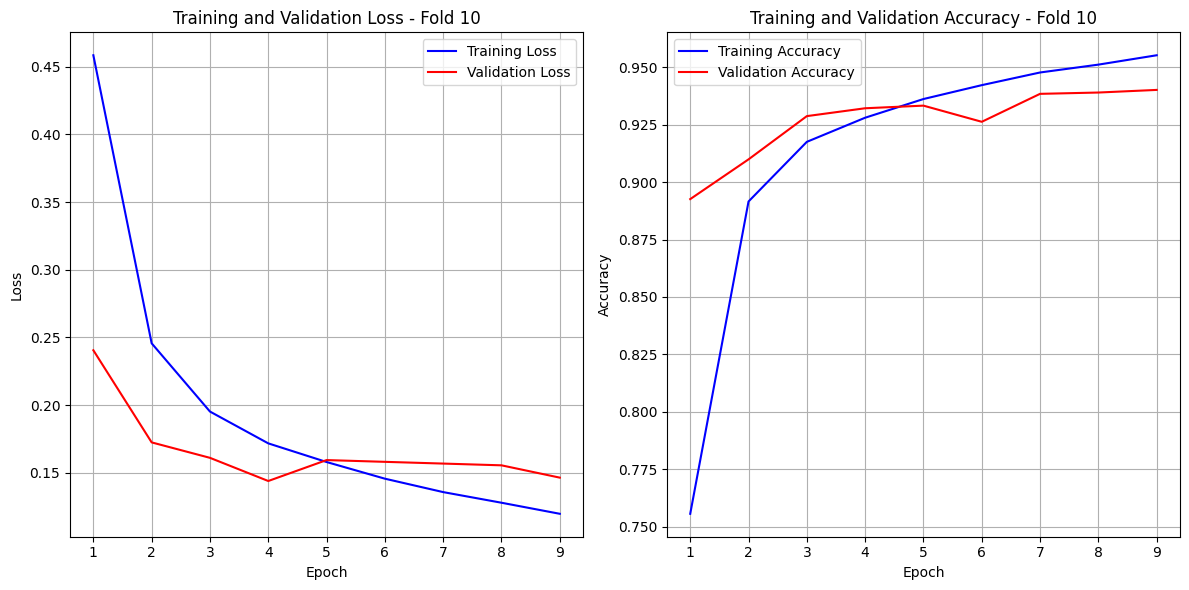


Average Accuracy: 93.48%
Average F1 Score: 0.9360


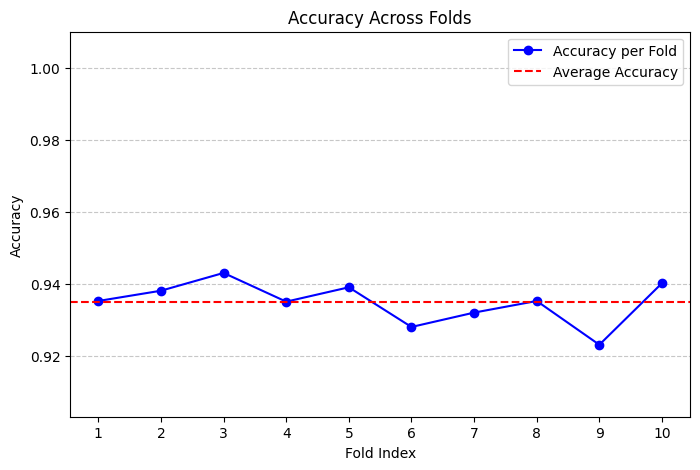

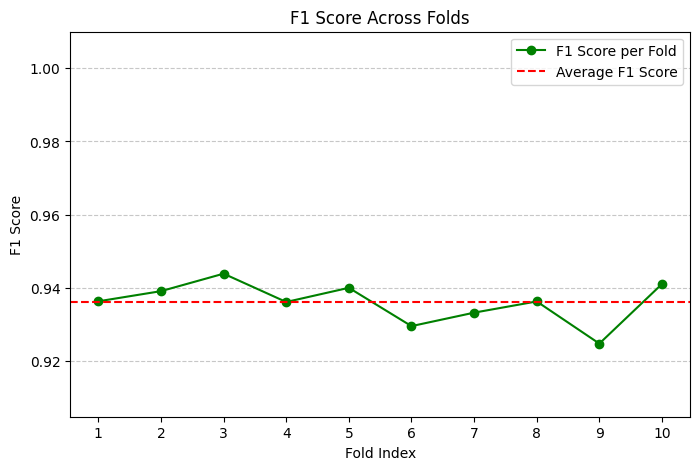

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Define Transformer Model 
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.3):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout(x)  # Apply dropout after embedding
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# Data from preprocessing
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses, average_val_losses = [], []
average_train_accuracies, average_val_accuracies = [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_combined_scaled)):
    print(f'\nFold {fold + 1}')

    # Split data
    X_train, X_val = X_combined_scaled.iloc[train_index], X_combined_scaled.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Ensure numeric data and handle missing values
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_tensor = torch.FloatTensor(class_weights).to('cpu')

    # Initialize model, loss, and optimizer
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(np.unique(y)), d_model=64, nhead=2, num_layers=2, dropout=0.3)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

    # Early stopping setup
    best_loss = float('inf')
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 50
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct_train, total_train = 0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            # Train accuracy
            _, predicted_train = torch.max(outputs, 1)
            correct_train += (predicted_train == labels).sum().item()
            total_train += labels.size(0)

        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            val_loss = criterion(y_pred_probs, y_val_tensor).item()
            val_losses.append(val_loss)
            _, y_pred = torch.max(y_pred_probs, 1)

        val_accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(val_accuracy)

        # Early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(val_accuracies[-1])
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print fold results
    print(f"Accuracy for fold {fold + 1}: {val_accuracies[-1] * 100:.2f}%")
    print(f"F1 Score for fold {fold + 1}: {f1:.4f}")
    print(classification_report(y_val, y_pred.numpy()))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

    # Plot Training and Validation Loss per Epoch for this fold
    plt.figure(figsize=(12, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
    plt.title(f'Training and Validation Loss - Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='red')
    plt.title(f'Training and Validation Accuracy - Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Average Metrics Across All Folds
print(f'\nAverage Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')  

# Plotting Accuracy and F1 Score for all folds
folds = range(1, len(all_accuracy) + 1)

# Accuracy Across Folds
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(all_accuracy) + 1), all_accuracy, color='blue', marker='o', label='Accuracy per Fold')
plt.axhline(y=np.mean(all_accuracy), color='red', linestyle='--', label='Average Accuracy')
plt.title('Accuracy Across Folds')
plt.xlabel('Fold Index')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(all_accuracy) + 1))
plt.ylim(min(all_accuracy) - 0.02, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# F1 Score Across Folds
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(all_f1_scores) + 1), all_f1_scores, color='green', marker='o', label='F1 Score per Fold')
plt.axhline(y=np.mean(all_f1_scores), color='red', linestyle='--', label='Average F1 Score')
plt.title('F1 Score Across Folds')
plt.xlabel('Fold Index')
plt.ylabel('F1 Score')
plt.xticks(range(1, len(all_f1_scores) + 1))
plt.ylim(min(all_f1_scores) - 0.02, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17148\376543814.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'model_best_fold_{fold + 1}.pt', map

Test Accuracy: 93.77%
Test F1 Score: 0.9388
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3502
           1       0.99      0.91      0.95      7018

    accuracy                           0.94     10520
   macro avg       0.92      0.95      0.93     10520
weighted avg       0.95      0.94      0.94     10520



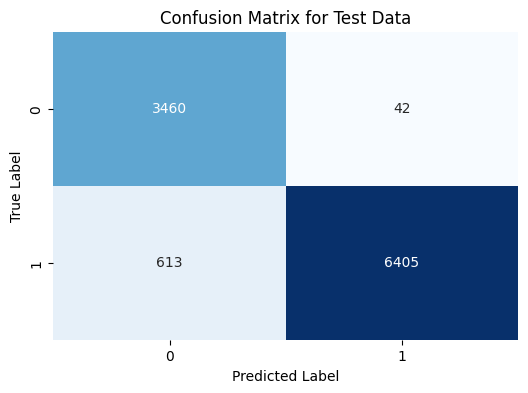

In [22]:
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the model with matching configurations (ensure configurations match the saved model)
best_model = TransformerModel(
    input_dim=X_train_tensor.shape[1],  # Pastikan sama dengan data latih sebelumnya
    num_classes=len(np.unique(y_train)), 
    d_model=32,  # Pastikan nilai ini sama dengan konfigurasi model saat pelatihan
    nhead=2, 
    num_layers=2, 
    dropout=0.3
)

# Load the saved model weights
checkpoint = torch.load(f'model_best_fold_{fold + 1}.pt', map_location=torch.device('cpu'))
best_model.load_state_dict(checkpoint, strict=False)  # Gunakan strict=False jika ada perbedaan kecil

# Prepare testing data (pastikan preprocessing sama seperti training)
X_test_scaled = scaler.transform(X_test)  # Gunakan scaler yang sama dengan data latih
X_test_tensor = torch.FloatTensor(X_test_scaled)  # Konversi langsung ke tensor
y_test_tensor = torch.LongTensor(y_test.values)  # Konversi label ke tensor

# Evaluate the model on the test set
best_model.eval()
with torch.no_grad():
    y_pred_probs = best_model(X_test_tensor)
    _, y_pred = torch.max(y_pred_probs, 1)

# Calculate performance metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred.numpy())
test_f1 = f1_score(y_test, y_pred.numpy(), average='weighted')
conf_matrix_test = confusion_matrix(y_test, y_pred.numpy())

# Print test results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_pred.numpy()))

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()
